# Homework 1 Exercise 1
Suppose the globe tossing data (Chapter 2) had turned out to be 4 water
and 11 land. Construct the posterior distribution, using grid approximation.
Use the same flat prior as in the book.

In [1]:
using StatsPlots
using StatisticalRethinking: hpdi, PI
using Gen, Distributions

In [2]:
grid_length = 100

100

In [3]:
# define grid
p_grid = Vector(range(0,1,length=grid_length))

100-element Vector{Float64}:
 0.0
 0.010101010101010102
 0.020202020202020204
 0.030303030303030304
 0.04040404040404041
 0.050505050505050504
 0.06060606060606061
 0.0707070707070707
 0.08080808080808081
 0.09090909090909091
 0.10101010101010101
 0.1111111111111111
 0.12121212121212122
 ⋮
 0.8888888888888888
 0.898989898989899
 0.9090909090909091
 0.9191919191919192
 0.9292929292929293
 0.9393939393939394
 0.9494949494949495
 0.9595959595959596
 0.9696969696969697
 0.9797979797979798
 0.98989898989899
 1.0

In [4]:
# define prior
prior = fill(1.0, grid_length)

100-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

Using Julia's dot syntax. This broadcasts Binomial over p_grid. So the n-th element in the vector `binomials` is a binomial distribution with n=15 and p=the n-th probability in p_grid.

In [5]:
binomials =  Binomial.(15, p_grid)

100-element Vector{Binomial{Float64}}:
 Binomial{Float64}(n=15, p=0.0)
 Binomial{Float64}(n=15, p=0.010101010101010102)
 Binomial{Float64}(n=15, p=0.020202020202020204)
 Binomial{Float64}(n=15, p=0.030303030303030304)
 Binomial{Float64}(n=15, p=0.04040404040404041)
 Binomial{Float64}(n=15, p=0.050505050505050504)
 Binomial{Float64}(n=15, p=0.06060606060606061)
 Binomial{Float64}(n=15, p=0.0707070707070707)
 Binomial{Float64}(n=15, p=0.08080808080808081)
 Binomial{Float64}(n=15, p=0.09090909090909091)
 Binomial{Float64}(n=15, p=0.10101010101010101)
 Binomial{Float64}(n=15, p=0.1111111111111111)
 Binomial{Float64}(n=15, p=0.12121212121212122)
 ⋮
 Binomial{Float64}(n=15, p=0.8888888888888888)
 Binomial{Float64}(n=15, p=0.898989898989899)
 Binomial{Float64}(n=15, p=0.9090909090909091)
 Binomial{Float64}(n=15, p=0.9191919191919192)
 Binomial{Float64}(n=15, p=0.9292929292929293)
 Binomial{Float64}(n=15, p=0.9393939393939394)
 Binomial{Float64}(n=15, p=0.9494949494949495)
 Binomial{Float64}(n

In [6]:
likelihood = pdf.(binomials, 4)

100-element Vector{Float64}:
 0.0
 1.2708420165621638e-5
 0.0001816409614433586
 0.0008204900423517895
 0.0023110234691922148
 0.005022166876567682
 0.009258106408094638
 0.015228705679171879
 0.02303668563856386
 0.032677014738890786
 0.044044816555172873
 0.05694883795524434
 0.07112814710110216
 ⋮
 2.7155322053549007e-8
 9.957831175388064e-9
 3.2677014738890926e-9
 9.348892341061158e-10
 2.248197610838495e-10
 4.3072519952304534e-11
 6.050429355548309e-12
 5.421994318654067e-13
 2.3879403084044624e-14
 2.8775416724408497e-16
 1.4638919924509724e-19
 0.0

In [7]:
unstd_posterior = likelihood .* prior

100-element Vector{Float64}:
 0.0
 1.2708420165621638e-5
 0.0001816409614433586
 0.0008204900423517895
 0.0023110234691922148
 0.005022166876567682
 0.009258106408094638
 0.015228705679171879
 0.02303668563856386
 0.032677014738890786
 0.044044816555172873
 0.05694883795524434
 0.07112814710110216
 ⋮
 2.7155322053549007e-8
 9.957831175388064e-9
 3.2677014738890926e-9
 9.348892341061158e-10
 2.248197610838495e-10
 4.3072519952304534e-11
 6.050429355548309e-12
 5.421994318654067e-13
 2.3879403084044624e-14
 2.8775416724408497e-16
 1.4638919924509724e-19
 0.0

In [8]:
posterior = unstd_posterior ./ sum(unstd_posterior)

100-element Vector{Float64}:
 0.0
 2.053886085296793e-6
 2.9356114951066903e-5
 0.00013260445115512002
 0.00037349874211811836
 0.0008116633327661351
 0.0014962596199975826
 0.0024612049557618154
 0.003723100705498932
 0.005281133689835242
 0.007118354183538623
 0.00920385258952262
 0.01149545810572837
 ⋮
 4.388738913308445e-9
 1.6093464509609816e-9
 5.281133689835264e-10
 1.5109320939975403e-10
 3.633450680510145e-11
 6.96121533878947e-12
 9.778471675848976e-13
 8.762819091996177e-14
 3.85929746422682e-15
 4.6505723952028507e-17
 2.3658860460137905e-20
 0.0

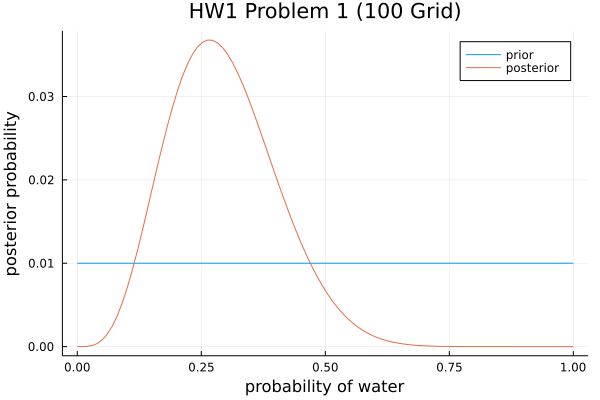

In [9]:
plot(p_grid, [(prior./sum(prior)) posterior], title="HW1 Problem 1 ($grid_length Grid)", xlabel="probability of water", ylabel="posterior probability", labels=["prior" "posterior"])